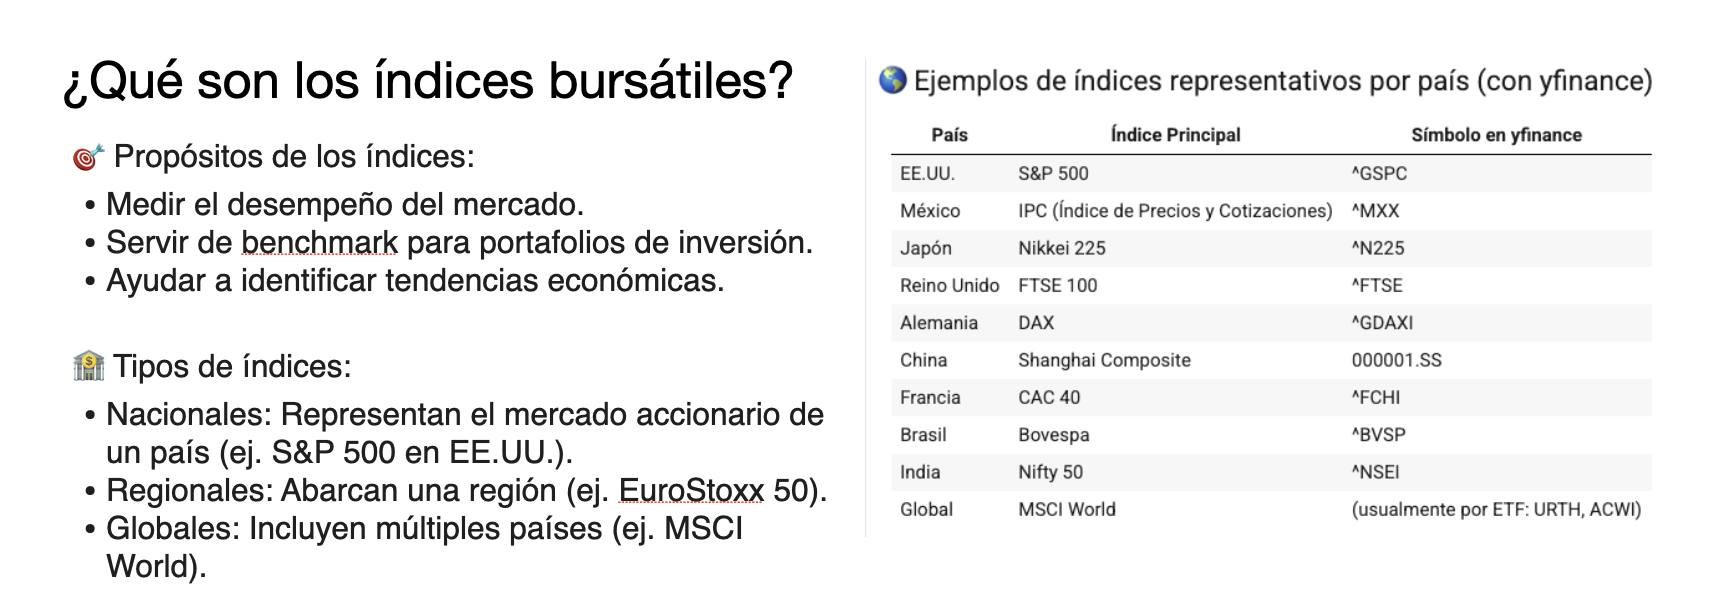

#### 💻 Ejemplo práctico en Python usando yfinance

[*********************100%***********************]  5 of 5 completed


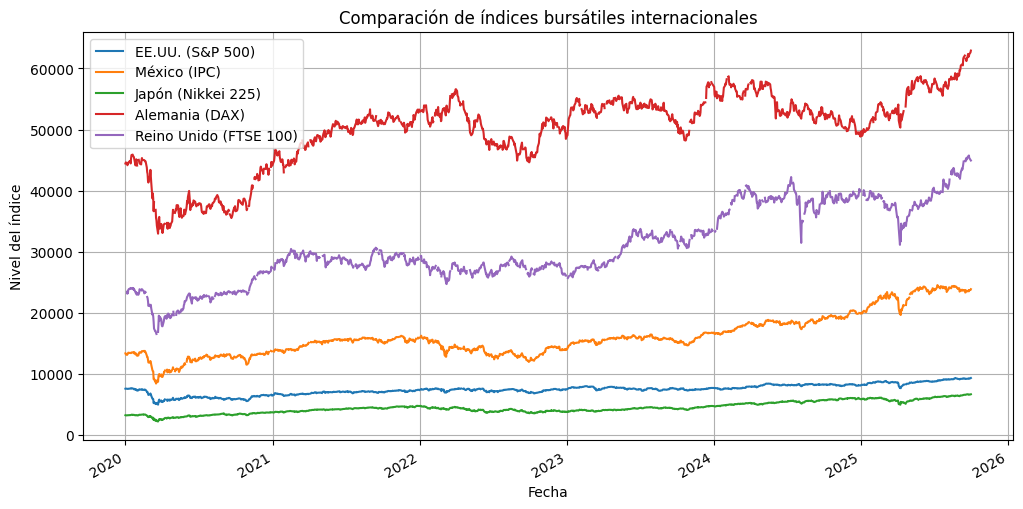

In [23]:
#  Ejemplo práctico en Python usando yfinance

import yfinance as yf
import matplotlib.pyplot as plt

# Selección de índices por país
indices = {
    "EE.UU. (S&P 500)": "^GSPC",
    "México (IPC)": "^MXX",
    "Japón (Nikkei 225)": "^N225",
    "Alemania (DAX)": "^GDAXI",
    "Reino Unido (FTSE 100)": "^FTSE"
}

# Descargar datos
data = yf.download(list(indices.values()), start="2020-01-01", end="2025-10-01", auto_adjust=True)["Close"]

# Renombrar columnas
data.columns = list(indices.keys())

# Graficar todos
data.plot(figsize=(12,6), title="Comparación de índices bursátiles internacionales")
plt.ylabel("Nivel del índice")
plt.xlabel("Fecha")
plt.grid()
plt.show()


#### 🧠 Preguntas de reflexión
	1.	¿Qué países muestran mayor crecimiento en sus índices desde 2020?
	2.	¿Qué factores económicos o políticos podrían explicar los movimientos observados?
	3.	¿Es recomendable invertir en un país con alto crecimiento bursátil reciente?
	4.	¿Qué riesgos existen al usar un solo índice como referencia de un país?

#### 🧪 Práctica integradora

Elabora un análisis comparativo entre los índices de México (^MXX) y EE.UU. (^GSPC) respondiendo:

	1. ¿Cuál ha tenido mejor rendimiento en los últimos 3 años?
	2. Calcula el rendimiento acumulado.
	3. ¿Cuál ha sido más volátil?
	4. ¿Cuál convendría más para un inversionista conservador?


In [24]:
# prompt: Calcula el rendimiento diario con pct_change, limpieza básica de daily_returns con dropna()

import matplotlib.pyplot as plt

# Calcula el rendimiento diario con pct_change
daily_returns = data.pct_change(fill_method=None)

# limpieza básica de daily_returns (elimina la primera fila con NaN)
daily_returns = daily_returns.dropna()
daily_returns

,EE.UU. (S&P 500),México (IPC),Japón (Nikkei 225),Alemania (DAX),Reino Unido (FTSE 100)
Date,,,,,
2020-01-07,-0.000185,0.007606,-0.002803,-0.007585,0.015982
2020-01-08,0.000132,0.007058,0.004902,0.007091,-0.015735
2020-01-09,0.003063,0.013129,0.006655,0.002277,0.023060
2020-01-10,-0.001342,-0.000871,-0.002855,0.001978,0.004663
2020-01-15,0.002676,-0.001798,0.001870,-0.007145,-0.004520
...,...,...,...,...,...
2025-09-22,0.001085,-0.004753,0.004410,0.013135,0.009942
2025-09-25,-0.003935,-0.005577,-0.005009,0.000631,0.002731
2025-09-26,0.007684,0.008695,0.005902,0.005844,-0.008741


In [25]:
# Calcula los rendimientos acumulados en una columna cumulative_returns
# cumprod: calculates the total return over a period by compounding the daily returns.
# It reflects how an initial investment would grow if it were continuously reinvested and 
# earned the daily returns.
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

,EE.UU. (S&P 500),México (IPC),Japón (Nikkei 225),Alemania (DAX),Reino Unido (FTSE 100)
Date,,,,,
2020-01-07,0.999815,1.007606,0.997197,0.992415,1.015982
2020-01-08,0.999947,1.014717,1.002085,0.999452,0.999996
2020-01-09,1.003010,1.028039,1.008755,1.001728,1.023056
2020-01-10,1.001663,1.027144,1.005874,1.003709,1.027827
2020-01-15,1.004344,1.025298,1.007756,0.996537,1.023181
...,...,...,...,...,...
2025-09-22,0.986784,1.391101,1.923976,1.392375,1.088477
2025-09-25,0.982901,1.383344,1.914339,1.393255,1.091450
2025-09-26,0.990453,1.395372,1.925637,1.401397,1.081909


### Medir el desempeño del mercado (Rendimientos Acumulados - cumulative_returns)

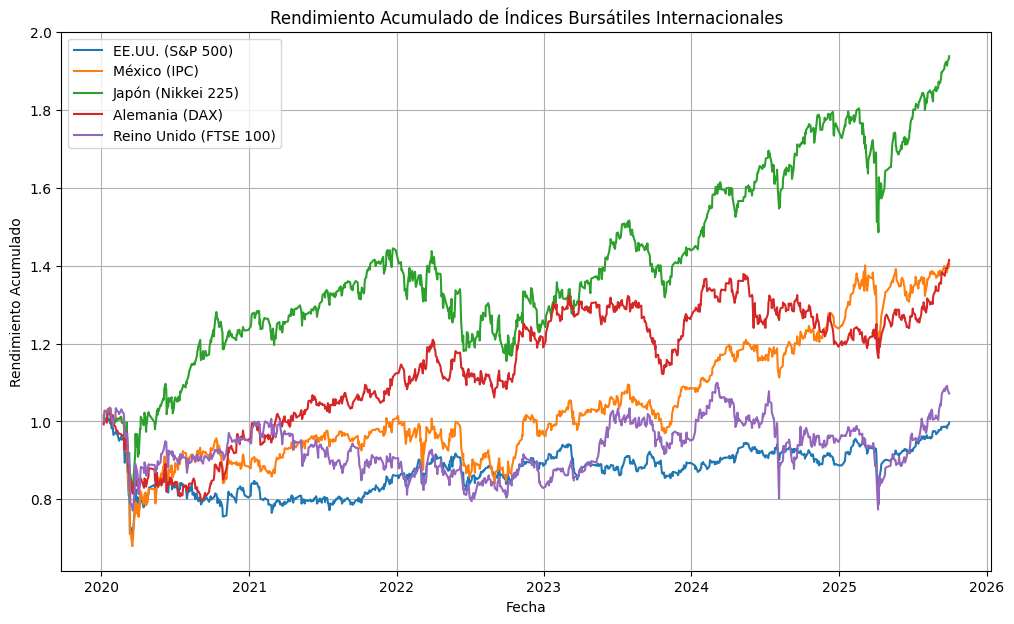

In [26]:
# prompt: Grafica el rendimiento acumulado en un solo gráfico

import matplotlib.pyplot as plt
# Plot all cumulative return series in a single plot
plt.figure(figsize=(12, 7))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)

plt.title("Rendimiento Acumulado de Índices Bursátiles Internacionales")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento Acumulado")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Rendimientos Acumulados al Final del Tiempo en % use .prod() y -1
cumulative_returns_final = (1 + daily_returns).prod() -1
cumulative_returns_final.sort_values(ascending=False)*100

Japón (Nikkei 225)        93.860997
Alemania (DAX)            41.508349
México (IPC)              40.367477
Reino Unido (FTSE 100)     7.183419
EE.UU. (S&P 500)          -0.254888
dtype: float64

### Volatilidad anualizada

In [28]:
# prompt: Calcula la volatilidad de cada uno cambia la columna por Volatilidad expresada en %

import pandas as pd

# Calcula la volatilidad anualizada
# (desviación estándar de los rendimientos diarios * raíz cuadrada del número de días de negociación al año)
annualized_volatility = daily_returns.std() * (252**0.5) # 252 días de negociación aprox al año

# Convierte a porcentaje
annualized_volatility_percent = annualized_volatility * 100

# Crea un DataFrame para mostrar la volatilidad
volatility_df = pd.DataFrame(annualized_volatility_percent, columns=["Volatilidad (%)"])

print("Volatilidad Anualizada de cada índice:")
volatility_df.sort_values(by="Volatilidad (%)", ascending=False)


Volatilidad Anualizada de cada índice:


,Volatilidad (%)
Reino Unido (FTSE 100),22.730209
Japón (Nikkei 225),21.330844
México (IPC),21.110091
EE.UU. (S&P 500),17.215110
Alemania (DAX),17.139491


### Identificar tendencias económicas

Rendimiento Acumulado de ^MXX y ^GSPC:
México (IPC)        43.404849
EE.UU. (S&P 500)    10.350195
dtype: float64 %

Volatilidad Anualizada de ^MXX y ^GSPC:
México (IPC)        20.616078
EE.UU. (S&P 500)    16.935673
dtype: float64


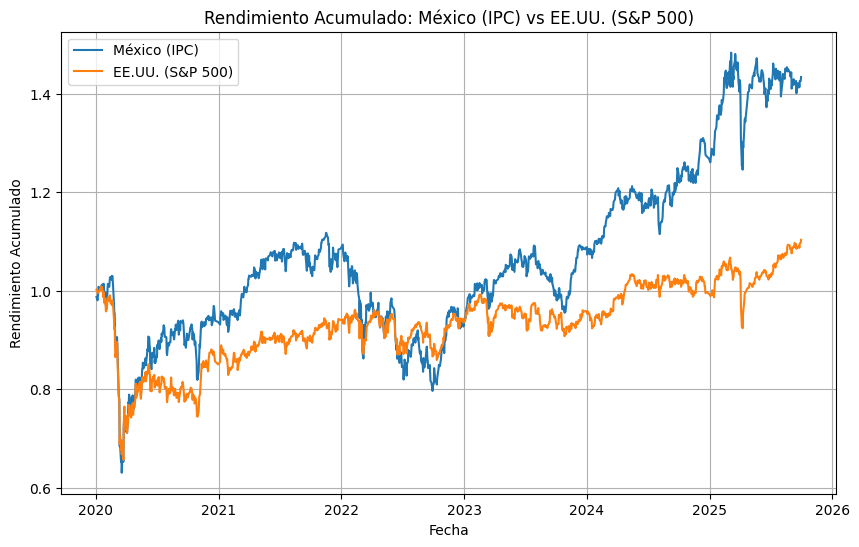


Análisis:
- Rendimiento en los últimos 3 años:
  - México (IPC) ha tenido mejor rendimiento.
- Volatilidad:
  - México (IPC) ha sido más volátil.
- Recomendación para inversionista conservador:
  - Un inversionista conservador podría preferir invertir en el índice con menor volatilidad 
 (EE.UU. (S&P 500)), aunque el rendimiento potencial sea menor.


In [29]:
# prompt: Ayudar a identificar tendencias económicas.

import matplotlib.pyplot as plt

# Práctica integradora (Continuación)

# Comparativa México (^MXX) vs EE.UU. (^GSPC)

# Selecciona los índices para la comparativa
comparative_indices = ["México (IPC)", "EE.UU. (S&P 500)"]
comparative_data = data[comparative_indices]

# Calcula el rendimiento diario
comparative_daily_returns = comparative_data.pct_change(fill_method=None).dropna()

# Calcula el rendimiento acumulado
comparative_cumulative_returns = (1 + comparative_daily_returns).cumprod()

# Calcula el rendimiento acumulado al final
cumulative_returns_final = (1 + comparative_daily_returns).prod() - 1

print("Rendimiento Acumulado de ^MXX y ^GSPC:")
print(f"{cumulative_returns_final*100} %") # Muestra el último valor (acumulado total)

# Calcula la volatilidad anualizada
comparative_annualized_volatility = comparative_daily_returns.std() * (252**0.5)
comparative_annualized_volatility_percent = comparative_annualized_volatility * 100

print("\nVolatilidad Anualizada de ^MXX y ^GSPC:")
print(comparative_annualized_volatility_percent)

# Gráfica de rendimiento acumulado comparativo
plt.figure(figsize=(10, 6))
for col in comparative_cumulative_returns.columns:
    plt.plot(comparative_cumulative_returns.index, comparative_cumulative_returns[col], label=col)

plt.title("Rendimiento Acumulado: México (IPC) vs EE.UU. (S&P 500)")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento Acumulado")
plt.legend()
plt.grid(True)
plt.show()

# Conclusiones basadas en los resultados
print("\nAnálisis:")
print(f"- Rendimiento en los últimos 3 años:")
print(f"  - {comparative_cumulative_returns.iloc[-1].idxmax()} ha tenido mejor rendimiento.")
print(f"- Volatilidad:")
print(f"  - {comparative_annualized_volatility_percent.idxmax()} ha sido más volátil.")
print(f"- Recomendación para inversionista conservador:")
print(f"  - Un inversionista conservador podría preferir invertir en el índice con menor volatilidad \n ({comparative_annualized_volatility_percent.idxmin()}), aunque el rendimiento potencial sea menor.")



[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


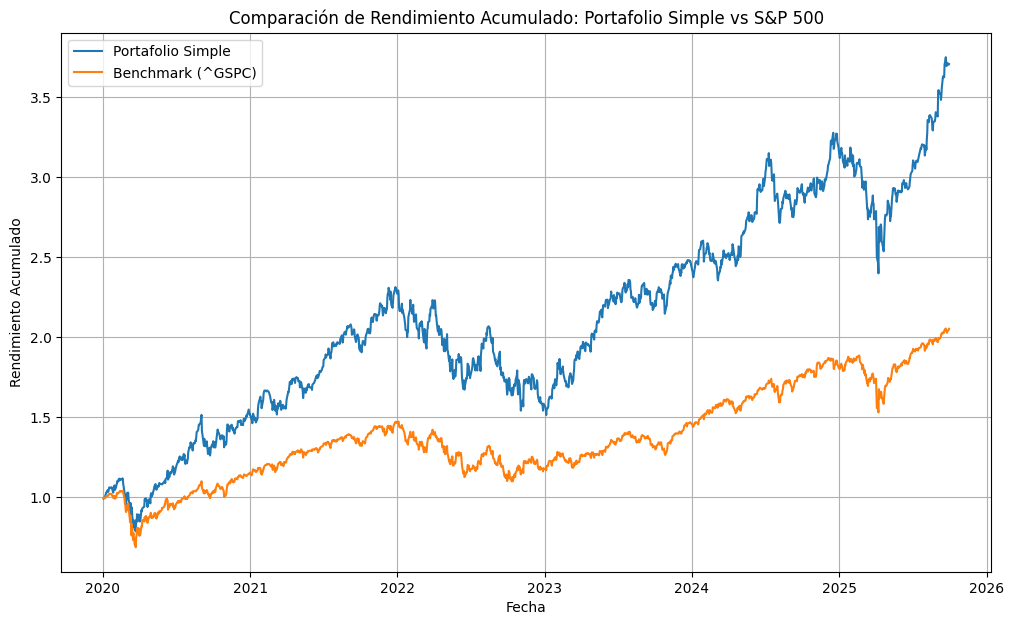


Rendimiento Total Acumulado:
Portafolio Simple: 270.80%
Benchmark (^GSPC): 105.30%

Volatilidad Anualizada:
Portafolio Simple: 28.19%
Benchmark (^GSPC): 21.22%


In [30]:
# prompt: Has un portafolio simple con acciones y comparalo con benchmark S&P500

import pandas as pd
import matplotlib.pyplot as plt
# --- Código para el portafolio simple ---

# Define las acciones del portafolio y sus pesos
# Ejemplo: Un portafolio simple con 3 acciones
portfolio_tickers = ["AAPL", "MSFT", "GOOGL"]
portfolio_weights = [0.4, 0.3, 0.3] # Los pesos deben sumar 1

# Define el benchmark (S&P 500)
benchmark_ticker = "^GSPC"

# Define el rango de fechas para el análisis
start_date = "2020-01-01"
end_date = "2025-10-01"

# Descarga los datos de las acciones del portafolio y el benchmark
portfolio_data = yf.download(portfolio_tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, auto_adjust=True)["Close"]

# Asegura que los datos del benchmark sean un DataFrame para concatenar
if isinstance(benchmark_data, pd.Series):
    benchmark_data = benchmark_data.to_frame(name=benchmark_ticker)

# Concatena los datos del portafolio y el benchmark
all_data = pd.concat([portfolio_data, benchmark_data], axis=1)

# Elimina filas con NaN para asegurar que todas las series inicien en la misma fecha de datos válidos
all_data = all_data.dropna()

# Calcula los rendimientos diarios para todas las series
daily_returns = all_data.pct_change().dropna()

# Calcula el rendimiento diario del portafolio
# Se calcula la suma ponderada de los rendimientos diarios de cada acción
portfolio_daily_returns = (daily_returns[portfolio_tickers] * portfolio_weights).sum(axis=1)

# Calcula los rendimientos acumulados para el portafolio y el benchmark
# Para el portafolio, usamos la serie calculada arriba
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
# Calcula al final
portafolio_cumulative_final = (1 + portfolio_daily_returns).prod() - 1

# Para el benchmark, calculamos directamente sobre su columna de rendimientos diarios
benchmark_cumulative_returns = (1 + daily_returns[benchmark_ticker]).cumprod()
# Calcula al final
benchmark_cumulative_final = (1 + daily_returns[benchmark_ticker]).prod() - 1


# Combina los rendimientos acumulados del portafolio y el benchmark en un solo DataFrame para graficar
comparison_cumulative_returns = pd.DataFrame({
    "Portafolio Simple": portfolio_cumulative_returns,
    benchmark_ticker: benchmark_cumulative_returns
})



# Grafica la comparación de rendimientos acumulados
plt.figure(figsize=(12, 7))
plt.plot(comparison_cumulative_returns.index, comparison_cumulative_returns["Portafolio Simple"], label="Portafolio Simple")
plt.plot(comparison_cumulative_returns.index, comparison_cumulative_returns[benchmark_ticker], label=f"Benchmark ({benchmark_ticker})")

plt.title("Comparación de Rendimiento Acumulado: Portafolio Simple vs S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento Acumulado")
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Imprimir el rendimiento total acumulado
print("\nRendimiento Total Acumulado:")
print(f"Portafolio Simple: {portafolio_cumulative_final * 100:.2f}%")
print(f"Benchmark ({benchmark_ticker}): {benchmark_cumulative_final * 100:.2f}%")

# Opcional: Calcular y comparar la volatilidad anualizada
portfolio_annualized_volatility = portfolio_daily_returns.std() * (252**0.5)
benchmark_annualized_volatility = daily_returns[benchmark_ticker].std() * (252**0.5)

print("\nVolatilidad Anualizada:")
print(f"Portafolio Simple: {portfolio_annualized_volatility * 100:.2f}%")
print(f"Benchmark ({benchmark_ticker}): {benchmark_annualized_volatility * 100:.2f}%")


In [31]:
# prompt: Si hubiese invertido en 2020 $100,000 en el portafolio simple cuanto hubiera ganado,
#         cual seria mi rendimiento y compáralo con el benchmark

# Calcula el valor final del portafolio y el benchmark si se invirtieron $100,000
initial_investment = 100000

# El rendimiento acumulado representa (Valor Final / Valor Inicial) - 1
# Entonces, Valor Final = Valor Inicial * (1 + Rendimiento Acumulado)

portfolio_final_value = initial_investment * (1 + portfolio_cumulative_returns.iloc[-1])
benchmark_final_value = initial_investment * (1 + benchmark_cumulative_returns.iloc[-1])

# Calcula la ganancia (Valor Final - Valor Inicial)
portfolio_gain = portfolio_final_value - initial_investment
benchmark_gain = benchmark_final_value - initial_investment

# Calcula el rendimiento en porcentaje
portfolio_return_percent = portafolio_cumulative_final * 100
benchmark_return_percent = benchmark_cumulative_final * 100

print(f"\nAnálisis de Inversión de ${initial_investment:,.2f} desde {start_date} hasta {end_date}:")
print("--- Portafolio Simple ---")
print(f"Valor Inicial: ${initial_investment:,.2f}")
print(f"Valor Final: ${portfolio_final_value:,.2f}")
print(f"Ganancia: ${portfolio_gain:,.2f}")
print(f"Rendimiento: {portfolio_return_percent:,.2f}%")

print("\n--- Benchmark (S&P 500) ---")
print(f"Valor Inicial: ${initial_investment:,.2f}")
print(f"Valor Final: ${benchmark_final_value:,.2f}")
print(f"Ganancia: ${benchmark_gain:,.2f}")
print(f"Rendimiento: {benchmark_return_percent:,.2f}%")

print("\n--- Comparación ---")
if portfolio_gain > benchmark_gain:
    print(f"El Portafolio Simple ganó ${portfolio_gain - benchmark_gain:,.2f} más que el Benchmark.")
elif benchmark_gain > portfolio_gain:
    print(f"El Benchmark ganó ${benchmark_gain - portfolio_gain:,.2f} más que el Portafolio Simple.")
else:
    print("El Portafolio Simple y el Benchmark tuvieron una ganancia similar.")

if portfolio_return_percent > benchmark_return_percent:
    print(f"El Portafolio Simple tuvo un rendimiento {portfolio_return_percent - benchmark_return_percent:,.2f}% mayor que el Benchmark.")
elif benchmark_return_percent > portfolio_return_percent:
    print(f"El Benchmark tuvo un rendimiento {benchmark_return_percent - portfolio_return_percent:,.2f}% mayor que el Portafolio Simple.")
else:
    print("El Portafolio Simple y el Benchmark tuvieron un rendimiento similar.")



Análisis de Inversión de $100,000.00 desde 2020-01-01 hasta 2025-10-01:
--- Portafolio Simple ---
Valor Inicial: $100,000.00
Valor Final: $470,799.22
Ganancia: $370,799.22
Rendimiento: 270.80%

--- Benchmark (S&P 500) ---
Valor Inicial: $100,000.00
Valor Final: $305,302.88
Ganancia: $205,302.88
Rendimiento: 105.30%

--- Comparación ---
El Portafolio Simple ganó $165,496.34 más que el Benchmark.
El Portafolio Simple tuvo un rendimiento 165.50% mayor que el Benchmark.


In [32]:
#@title Seleccione Acción y Fecha {run:'auto'}
ticker = "NVDA" #@param ["AAPL", "MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM","BRK.B", "V", "JPM", "XOM", "LLY", "MRK", "UNH", "PG", "MA","CVX", "KO", "PEP", "COST", "TMO", "ORCL", "CSCO", "NKE", "VZ", "ASML", "TXN", "ABT", "TM", "SAP", "AMD", "NFLX", "NOW", "ADBE", "LVMUY", "BABA", "SHEL", "TMUS", "QCOM", "PFE", "SNY", "AZN", "TOT", "GSK", "RIO", "BHP", "MCD​"]
#ticker = "BTC-USD" #@param ["BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "LTC-USD", "ADA-USD", "DOT-USD", "BCH-USD", "XLM-USD", "LINK-USD"]

start_date = '2022-01-01' #@param {type:'date'}
end_date = '2025-08-20' #@param {type:'date'}
inversion_inicial = 10000 #@param {type:'number'}


df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
df = df[["Close"]]
df.dropna(inplace=True)  # Limpieza básica NaN

# isinstance() es una función incorporada de Python que se usa para verificar
# si un objeto pertenece a una clase o tipo específico,
# o a una subclase de esa clase.
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df
# DataFrame o la estructura de los datos para trabajar con ella


[*********************100%***********************]  1 of 1 completed


Price,Close
Date,
2022-01-03,30.064440
2022-01-04,29.234999
2022-01-05,27.552164
2022-01-06,28.125086
2022-01-07,27.195837
...,...
2025-08-13,181.579758
2025-08-14,182.009735
2025-08-15,180.439819
